Importing the pandas library to manage data, the task then reads a CSV file from the specified path into a structured DataFrame. Displaying the summary, it provides details on column names, data types, and the count of non-null values in each column.

In [28]:
import pandas as pd
df=pd.read_csv("C:\\Users\\Saicharan\\Downloads\\aws_review_sofware_dataset (1).csv")
df.info()


C:\Users\Saicharan\AppData\Local\Temp\ipykernel_11196\3504120845.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("C:\\Users\\Saicharan\\Downloads\\aws_review_sofware_dataset (1).csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459436 entries, 0 to 459435
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      459436 non-null  int64  
 1   overall         459436 non-null  float64
 2   verified        459436 non-null  bool   
 3   reviewTime      459436 non-null  object 
 4   reviewerID      459436 non-null  object 
 5   asin            459436 non-null  object 
 6   style           234401 non-null  object 
 7   reviewerName    459360 non-null  object 
 8   reviewText      459350 non-null  object 
 9   summary         459375 non-null  object 
 10  unixReviewTime  459436 non-null  int64  
 11  vote            127853 non-null  object 
 12  image           1508 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 42.5+ MB


 Displaying first few rows of the dataset

In [30]:
df.head()

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN
1,1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN
2,2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,7,NaN
3,3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,{'Format:': ' Loose Leaf'},Lucy,This book was missing pages!!! Important pages...,missing pages!!,1392595200,3,NaN
4,4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,NaN,Albert V.,I have used LearnSmart and can officially say ...,Best study product out there!,1381708800,NaN,NaN


Calculating the number of missing (null) values in each column of the DataFrame, this command returns the total count of null values per column

In [32]:
df.isnull().sum()

Unnamed: 0             0
overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
style             225035
reviewerName          76
reviewText            86
summary               61
unixReviewTime         0
vote              331583
image             457928
dtype: int64

Dropping rows that have missing values in the 'reviewText' column, this command removes entries where 'reviewText' is null.

In [34]:

df = df.dropna(subset=['reviewText'])

Converting all text in the 'reviewText' column to lowercase, this command ensures uniformity in the text data. Displaying the last five rows of the DataFrame, it allows for a quick check of the updated data.

In [36]:
df['reviewText'] = df['reviewText'].str.lower()
df.tail()

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
459431,459431,2.0,True,"11 29, 2016",AGEWYJ2NF5C2H,B01HF41TKI,NaN,Bonita Alferes,no instructions.....no help unless you want to...,Two Stars,1480377600,NaN,NaN
459432,459432,1.0,True,"03 1, 2018",A3VCFV8WEQG9R5,B01HF3G4BS,NaN,mekonen,it's a joke,One Star,1519862400,NaN,NaN
459433,459433,5.0,True,"12 2, 2017",A3DXGHJF6SOHNC,B01HF3G4BS,NaN,bbeckham,i have multiple licenses of the antivirus. i h...,This is very effective antivirus software.,1512172800,NaN,NaN
459434,459434,5.0,True,"09 15, 2018",A1WOS4D7QA06DO,B01HJAMWOK,NaN,Charles E. Potter,good value,Five Stars,1536969600,NaN,NaN
459435,459435,5.0,True,"10 5, 2016",A20SG9ZGIIFW69,B01HJAMWOK,NaN,Joe,very nice designs easy to use.,Five Stars,1475625600,NaN,NaN


Using a regular expression to remove HTML tags from the text, this function cleans the 'reviewText' column by stripping out any HTML formatting. Displaying the first five rows of the DataFrame, it allows verification of the cleaned text data.

In [38]:

import re
def remove_html_tags(text):
    text = re.sub(r'<.*?>', '', text)
    return text
df['reviewText'] = df['reviewText'].apply(remove_html_tags)
df.head()

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,the materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN
1,1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,i am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN
2,2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"if you are taking this class don""t waste your ...",ARE YOU KIDING ME?,1392595200,7,NaN
3,3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,{'Format:': ' Loose Leaf'},Lucy,this book was missing pages!!! important pages...,missing pages!!,1392595200,3,NaN
4,4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,NaN,Albert V.,i have used learnsmart and can officially say ...,Best study product out there!,1381708800,NaN,NaN



Removing URLs from the text, this function uses a regular expression to identify and eliminate any web links present in the 'reviewText' column. Displaying the first five rows of the DataFrame allows for checking that the URLs have been successfully removed from the text.

In [40]:
def remove_url(text):
    text = re.sub(r'https?://\S+|www.\.\S+','',text)
    return text
df['reviewText'] = df['reviewText'].apply(remove_url)
df.head()

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,the materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN
1,1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,i am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN
2,2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"if you are taking this class don""t waste your ...",ARE YOU KIDING ME?,1392595200,7,NaN
3,3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,{'Format:': ' Loose Leaf'},Lucy,this book was missing pages!!! important pages...,missing pages!!,1392595200,3,NaN
4,4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,NaN,Albert V.,i have used learnsmart and can officially say ...,Best study product out there!,1381708800,NaN,NaN



Removing non-alphabetic characters from the text, this function replaces any character that is not a letter with a space. Applying it to the 'reviewText' column ensures that only alphabetic content remains, and displaying the first five rows allows verification of the cleaning process.

In [42]:
def remove_url(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    return text
df['reviewText'] = df['reviewText'].apply(remove_url)
df.head()


,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,the materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN
1,1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,i am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN
2,2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,if you are taking this class don t waste your ...,ARE YOU KIDING ME?,1392595200,7,NaN
3,3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,{'Format:': ' Loose Leaf'},Lucy,this book was missing pages important pages...,missing pages!!,1392595200,3,NaN
4,4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,NaN,Albert V.,i have used learnsmart and can officially say ...,Best study product out there!,1381708800,NaN,NaN


This function removes stopwords and applies stemming to each word in the 'reviewText' column. First, it splits the text into words, filters out common stopwords, and then reduces each word to its root form using the Porter Stemmer. The cleaned and processed words are then joined back into a single string for each entry in the column.

In [44]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english')) 
def tokenization_root_word(text):
    words = text.split()
    words= [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

df['reviewText'] = df['reviewText'].apply(tokenization_root_word)



In [45]:
df['reviewText'].head()

0    materi arriv earli excel condit howev money sp...
1    realli enjoy book worksheet make review goal m...
2    take class wast money call book book isin even...
3    book miss page import page answer test questio...
4    use learnsmart offici say amaz studi tool quic...
Name: reviewText, dtype: object

Using the VADER sentiment analysis tool, this function analyzes the sentiment of each review in the 'reviewText' column. It calculates a sentiment score and assigns 'Positive', 'Negative', or 'Neutral' based on the compound score. The result is stored in a new 'Sentiment' column within the DataFrame for further analysis or visualization.

In [47]:

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns


nltk.download('vader_lexicon')


sia = SentimentIntensityAnalyzer()


def get_vader_sentiment(review):
    # Convert to string to handle any non-string values
    score = sia.polarity_scores(str(review))
    # Determine the sentiment based on the compound score
    if score['compound'] > 0.05:
        return 'Positive'
    elif score['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'


df['Sentiment'] = df['reviewText'].apply(get_vader_sentiment)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Saicharan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [48]:
df[['reviewText','Sentiment']].head()

,reviewText,Sentiment
0,materi arriv earli excel condit howev money sp...,Positive
1,realli enjoy book worksheet make review goal m...,Positive
2,take class wast money call book book isin even...,Neutral
3,book miss page import page answer test questio...,Negative
4,use learnsmart offici say amaz studi tool quic...,Positive


In [49]:
data = df.head(10000)

In [50]:
data.head()

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,Sentiment
0,0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,materi arriv earli excel condit howev money sp...,Material Great,1394496000,NaN,NaN,Positive
1,1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,realli enjoy book worksheet make review goal m...,Health,1393113600,NaN,NaN,Positive
2,2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,take class wast money call book book isin even...,ARE YOU KIDING ME?,1392595200,7,NaN,Neutral
3,3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,{'Format:': ' Loose Leaf'},Lucy,book miss page import page answer test questio...,missing pages!!,1392595200,3,NaN,Negative
4,4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,NaN,Albert V.,use learnsmart offici say amaz studi tool quic...,Best study product out there!,1381708800,NaN,NaN,Positive



Preprocessing the text data by converting all characters to lowercase and removing punctuation, this function keeps only alphanumeric characters and spaces. The transformation is applied to the 'reviewText' column, ensuring the text is cleaned and ready for further analysis or feature extraction.

In [51]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Example preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text

# Apply preprocessing to the correct column using .loc to avoid the warning
data.loc[:, 'reviewText'] = data['reviewText'].apply(preprocess_text)


In [52]:
# Display the list of column names in the DataFrame
print(data.columns)


Index(['Unnamed: 0', 'overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'vote', 'image', 'Sentiment'],
      dtype='object')


Initializing the CountVectorizer, this process converts the processed text in the 'reviewText' column into a matrix of token counts. Fitting and transforming the text data produces a sparse matrix, which is then converted into a DataFrame for easier interpretation. The resulting DataFrame displays the token counts for each word across the reviews, showing the first few rows for verification.

In [53]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the processed text data
X = vectorizer.fit_transform(data['reviewText'])

# Convert the result to a DataFrame for easier interpretation
count_vector_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the CountVectorized DataFrame
print(count_vector_df.head())


   aaa  aaaa  aaaaaannnnnnnndddddd  aaarrggghhh  aaland  aand  aanp  aatrix  \
0    0     0                     0            0       0     0     0       0   
1    0     0                     0            0       0     0     0       0   
2    0     0                     0            0       0     0     0       0   
3    0     0                     0            0       0     0     0       0   
4    0     0                     0            0       0     0     0       0   

   ab  aback  ...  zoombinivil  zoomblini  zoonbini  zorich  zoskwar  zr  \
0   0      0  ...            0          0         0       0        0   0   
1   0      0  ...            0          0         0       0        0   0   
2   0      0  ...            0          0         0       0        0   0   
3   0      0  ...            0          0         0       0        0   0   
4   0      0  ...            0          0         0       0        0   0   

   zuknoen  zulu  zune  zzzz  
0        0     0     0     0  
1     

In [54]:
# Display the token counts for the first document
print(count_vector_df.iloc[0])


aaa                     0
aaaa                    0
aaaaaannnnnnnndddddd    0
aaarrggghhh             0
aaland                  0
                       ..
zr                      0
zuknoen                 0
zulu                    0
zune                    0
zzzz                    0
Name: 0, Length: 15944, dtype: int64


In [55]:
# Save the CountVectorized DataFrame to a CSV file
count_vector_df.to_csv('count_vectorized_data.csv', index=False)


Splitting the dataset into training and test sets, this process uses the features from the CountVectorized DataFrame (X) and the labels (y). The train_test_split function reserves 20% of the data for testing, ensuring that the training and test sets are independent for model evaluation. The random_state=42 ensures reproducibility of the split.

In [56]:
from sklearn.model_selection import train_test_split

# Assuming 'label' is the column in your original DataFrame that you want to predict
y = data['reviewText']  # Labels
X = count_vector_df  # Features from CountVectorization

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Initializing the VADER sentiment analyzer, this process calculates sentiment scores for each entry in the 'reviewText' column, specifically extracting the compound score. The sentiment is then categorized as 'positive', 'negative', or 'neutral' based on the score value. Finally, the first few rows are displayed, showing the review text, sentiment score, and sentiment label for verification.

In [57]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis on the reviewText column
data['sentiment'] = data['reviewText'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize sentiment scores into positive, negative, and neutral
data['sentiment_label'] = data['sentiment'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

# Display the first few rows
(data[['reviewText', 'sentiment', 'sentiment_label']].head())


C:\Users\Saicharan\AppData\Local\Temp\ipykernel_11196\3899482781.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['reviewText'].apply(lambda x: sia.polarity_scores(x)['compound'])
C:\Users\Saicharan\AppData\Local\Temp\ipykernel_11196\3899482781.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment_label'] = data['sentiment'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))


,reviewText,sentiment,sentiment_label
0,materi arriv earli excel condit howev money sp...,0.4588,positive
1,realli enjoy book worksheet make review goal m...,0.4939,positive
2,take class wast money call book book isin even...,0.0000,neutral
3,book miss page import page answer test questio...,-0.1531,negative
4,use learnsmart offici say amaz studi tool quic...,0.7717,positive


Setting the plot style to "whitegrid" for a clean background, the distribution of sentiment labels is then visualized using a histogram. The plot uses a cool-warm color palette to differentiate between sentiment categories ('positive', 'negative', 'neutral'). Labels for the title, x-axis, and y-axis are added, and the distribution is displayed in a figure sized 8x6 for clear presentation.

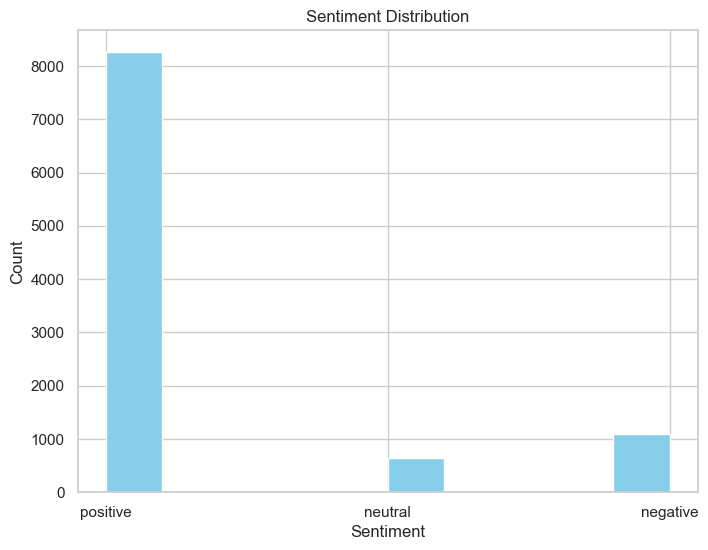

In [62]:
# Set the style and color palette for the plots
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

# Plot the distribution of sentiment labels
plt.figure(figsize=(8,6))
plt.hist(data['sentiment_label'], color='skyblue')  # Removed palette and added color
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
